# 2. Análisis exploratorio y limpieza de datos

### Algunas cosas para leer

#### ¿De dónde vienen los datos que vamos a usar?
https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate?select=beer_reviews.csv

#### ¿Qué significa cada uno de los campos?
https://www.singingboysbrewing.com/blog/tasting-and-evaluating-your-beer-an-introduction

#### ¿Cómo se puntúa una cerveza?
https://www.bjcp.org/

#### ¿Qué es un boxplot?
https://datavizcatalogue.com/ES/metodos/diagrama_cajas_y_bigotes.html

#### ¿Qué es un diagrama de violín?
https://datavizcatalogue.com/ES/metodos/diagrama_de_violin.html

## Importamos paquetes necesarios

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import chart_utils as acu

## Lectura de los datos iniciales

In [2]:
file_dataset_inicial = 'dataset/beer_reviews.csv'

df = pd.read_csv(file_dataset_inicial)
df.drop(columns=['index'], inplace=True)
df = df.loc[:, ['beer_beerid','beer_name', 'brewery_id','brewery_name', 'beer_style','beer_abv', 'review_profilename','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste']]
df.head(5)

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,stcules,1234817823,1.5,2.0,2.5,1.5,1.5
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,stcules,1235915097,3.0,2.5,3.0,3.0,3.0
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,stcules,1235916604,3.0,2.5,3.0,3.0,3.0
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,stcules,1234725145,3.0,3.0,3.5,2.5,3.0
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,johnmichaelsen,1293735206,4.0,4.5,4.0,4.0,4.5


## Entendiendo nuestros datos

### ¿Qué significa cada campo?

(https://www.singingboysbrewing.com/blog/tasting-and-evaluating-your-beer-an-introduction)

1. **beer_beerid** a unique ID indicating the beer reviewed

1. **beer_name** name of the beer

1. **brewery_id** a unique ID indicating the brewery

1. **brewery_name** the brewery name

1. **beer_style** the style of the beer

1. **beer_abv** the alcohol by volume of the beer

1. **review_profilename** profile name of the user

1. **review_time** the date/time of the review

1. **review_aroma** <br> Smell first - there are volatile compounds that may quickly dissipate. Plus, aroma helps set up our sense of taste. You can help concentrate the aromas by covering the top of the glass with your hand and gently swirling the beer. Short, quick sniffs are most effective, usually. Look for: <br>
    1. malt and grain aromas (bread, caramel, biscuit, toast, chocolate, roasted, coffee)
    1. hop aromas (earthiness, citrus, spice, pine, floral, herbal)
    1. esters (pit fruits, plums, cherries, apples, pears)
    1. other (spices like pepperiness or other additions like fruit the brewer may have used)


    Aromas trigger memories - linger on those memories, use them to help you describe the aroma. 

1. **review_appearance** <br> The color of the beer, the clarity of the beer, and the color/size/retention of the head.

1. **review_palate** <br> Take a sip of the beer and hold it in your mouth for a moment before swallowing. Just as you did when evaluating the aroma, look for malt, grain and hop flavors. <br> In addition to hop flavors, hops also add bitterness and, when tasting the beer, you can note the level of bitterness and its quality.  Another component of flavor is the balance between malt flavors and bitterness. Look for the balance of the flavors, whether the beer is malt-forward or dominated by a strong bracing bitterness, or in balance. Look for both components of hops – bitterness and flavor, they are different. <br> Similar to ester aromas, you should note esters in the flavors, which often arise from yeast and fermentation.  Other yeast and fermentation character can also present, such as spices like black pepper or coriander. <br> Some beers will have purposeful tartness or sourness. Acidity plays an important role in beer flavor. Is the beer dry or sweet? Some flavors hit your palate first and fade, others last throughout the finish and aftertaste. <br> As you taste, try a technique called 'aspiration' - either hold some of the beer in your mouth as you breathe in and out over it or immediately after swallowing the beer, breathe out through your nose. Aspiration gets aroma molecules up into your nose, which enhances your perception of flavors, as aroma and flavor are interconnected. 

1. **review_taste** (mouthfeel) <br> While tasting the beer, pay attention to its character and qualities on your tongue. Is the beer full-, medium-, or light-bodied? Is the carbonation effervescent, medium or low? Is there astringency or a creaminess to the beer? Alcohol warmth?

1. **review_overall** <br> After you’ve looked at all the individual elements, you need to see if the components come together into an enjoyable, harmonious whole.  Were there any significant flaws or off-flavors in the beer (plastic, medicinal, unintended sourness, oxidation, etc.)?  How would this beer pair with different foods? In what contexts would you enjoy this beer - sipping by the fire on a cold winter's night or drinking by the pint on the back porch on a warm summer day?  In a competition, does the beer fit within the style?  Also, this is where you might offer a suggestion on how the brewer might improve the beer or address a flaw. 

### Número de reseñas

In [3]:
total_resenias = len(df)
total_resenias

1586614

## Trabajando con múltiples reseñas

#### ¿Existen usuarios que hayan hecho más de un review a una misma cerveza?

In [29]:

df_resenias = df[['beer_beerid', 'beer_name', 'review_profilename', 'brewery_name', 'review_time']].copy().drop_duplicates()
df_tmp = df_resenias.groupby(['beer_beerid', 'beer_name', 'brewery_name', 'review_profilename'])['review_time'].size().reset_index(name='counts')
df_tmp["RANK"] = df_tmp.groupby("counts")['review_profilename'].rank(method="first", ascending=True)
df_tmp = df_tmp[df_tmp['RANK'] <= 4].sort_values(by=['counts', 'RANK'], ascending=[False, True])[['review_profilename', 'counts', 'beer_name', 'brewery_name']]
df_tmp.columns = ['review_profilename', 'numero_de_catas', 'beer_name', 'brewery_name']
df_tmp.reset_index(drop=True)

,review_profilename,numero_de_catas,beer_name,brewery_name
0,AgentMunky,4,IPA,Good People Brewing Company
1,AleWatcher,4,Alpha King Pale Ale,Three Floyds Brewing Co. & Brewpub
2,BretSikkink,4,Hop Knot,Four Peaks Brewing Company
3,ClarkVV,4,Harpoon Kellerbier (100 Barrel Series #13),Harpoon Brewery
4,AlCaponeJunior,3,Schlafly Dry-Hopped American Pale Ale,Saint Louis Brewery / Schlafly Tap Room
5,AlCaponeJunior,3,Schlafly American IPA,Saint Louis Brewery / Schlafly Tap Room
6,AleWatcher,3,Dreadnaught IPA,Three Floyds Brewing Co. & Brewpub
7,AleWatcher,3,Tröegs Pale Ale,Tröegs Brewing Company
8,100floods,2,Sierra Nevada Torpedo Extra IPA,Sierra Nevada Brewing Co.
9,11osixBrew,2,Sierra Nevada Celebration Ale,Sierra Nevada Brewing Co.


#### ¿Qué hacemos cuando un usuario realiza más de una reseña? ¿Qué estrategias podemos utilizar?

1. ¿Nos quedamos con todas las reseña que hizo?
1. ¿Generamos un promedio sobre las reseña que hizo?
1. ¿Nos quedamos con la primera reseña?
1. ¿Nos quedamos con la última reseña?

¿Cuál son los pros y los contras de cada estrategia?

#### Estrategia elegida: quedarnos con la última reseña de cada usuario

In [31]:
idx = df.groupby(['beer_beerid', 'review_profilename'])['review_time'].transform(max) == df['review_time']
df_resenias_unicas = df[idx]
df_resenias_unicas.head(5)

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,stcules,1234817823,1.5,2.0,2.5,1.5,1.5
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,stcules,1235915097,3.0,2.5,3.0,3.0,3.0
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,stcules,1235916604,3.0,2.5,3.0,3.0,3.0
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,stcules,1234725145,3.0,3.0,3.5,2.5,3.0
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,johnmichaelsen,1293735206,4.0,4.5,4.0,4.0,4.5


#### ¿Cómo afecta al dataset quedarnos con una única reseña por usuario?

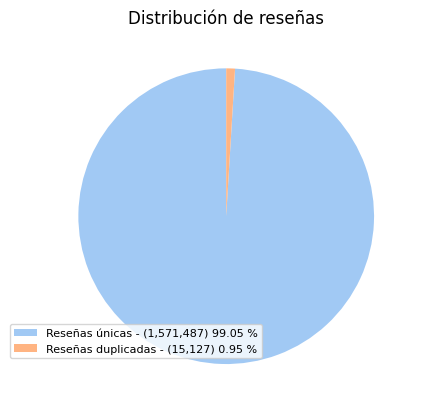

In [32]:
resenias_unicas = len (df_resenias_unicas)
resenias_duplicadas = total_resenias - resenias_unicas

data = [resenias_unicas, resenias_duplicadas]
labels = ['Reseñas únicas', 'Reseñas duplicadas']

y=np.array(data)
porcent = 100.*y/y.sum()

labels = ['{0} - ({2:,}) {1:1.2f} %'.format(i,j,h) for i,j,h in zip(labels, porcent, data)]

colors = sns.color_palette('pastel')[0:5]
plt.title('Distribución de reseñas')
plt.pie(data, colors = colors, startangle=90)
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.1, 0.1), fontsize=8)
plt.show()

#### Guardamos el nuevo dataset

In [33]:
file_resenias_unicas = 'dataset/cervezas_resenias_unicas.csv'

In [34]:
df_resenias_unicas.to_csv(file_resenias_unicas, index=False)
df = df_resenias_unicas

In [35]:
df = pd.read_csv(file_resenias_unicas)
df

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,stcules,1234817823,1.5,2.0,2.5,1.5,1.5
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,stcules,1235915097,3.0,2.5,3.0,3.0,3.0
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,stcules,1235916604,3.0,2.5,3.0,3.0,3.0
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,stcules,1234725145,3.0,3.0,3.5,2.5,3.0
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,johnmichaelsen,1293735206,4.0,4.5,4.0,4.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571482,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,maddogruss,1162684892,5.0,4.0,3.5,4.0,4.0
1571483,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,yelterdow,1161048566,4.0,5.0,2.5,2.0,4.0
1571484,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,TongoRad,1160702513,4.5,3.5,3.0,3.5,4.0
1571485,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,dherling,1160023044,4.0,4.5,4.5,4.5,4.5


### ¿Qué hacemos con las valoraciones de cervezas que no tienen registrada la graduación alcohólica?

In [36]:
cantidad_resenias_alcohol_nulo = len(df[pd.isnull(df['beer_abv'])])
cantidad_resenias_alcohol_nulo

67429

In [37]:
df[pd.isnull(df['beer_abv'])]

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
272,21241,Cauldron Espresso Stout,1075,Caldera Brewing Company,American Stout,NaN,RedDiamond,1103668195,3.0,3.0,3.0,4.0,3.0
428,20689,The Highland Stagger,850,Moon River Brewing Company,Scotch Ale / Wee Heavy,NaN,cMonkey,1110736110,3.5,4.0,4.5,3.5,3.5
601,20689,The Highland Stagger,850,Moon River Brewing Company,Scotch Ale / Wee Heavy,NaN,aracauna,1100038819,4.0,3.5,4.0,3.5,3.5
731,54723,Alpha Beta,1075,Caldera Brewing Company,American IPA,NaN,plaid75,1260673921,4.0,4.0,4.0,4.0,4.0
796,42964,Imperial Stout,1075,Caldera Brewing Company,American Double / Imperial Stout,NaN,grumpy,1212201268,4.5,4.5,4.0,4.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571442,36424,Bock,14359,The Defiant Brewing Company,Bock,NaN,maddogruss,1187052567,4.0,3.5,4.0,4.0,4.0
1571460,36555,Maibock,14359,The Defiant Brewing Company,Maibock / Helles Bock,NaN,BBM,1177842168,3.5,4.5,4.0,4.5,4.0
1571469,48360,Resolution #2,14359,The Defiant Brewing Company,Belgian Strong Pale Ale,NaN,hoppymcgee,1287951067,4.0,3.0,5.0,4.0,3.5
1571470,48360,Resolution #2,14359,The Defiant Brewing Company,Belgian Strong Pale Ale,NaN,WesWes,1241906223,4.5,4.5,4.0,4.0,4.0


In [38]:
df_resenias_unicas_sin_alcohol_nulo = df[~pd.isnull(df['beer_abv'])]

### ¿Cómo afecta el dataset original?

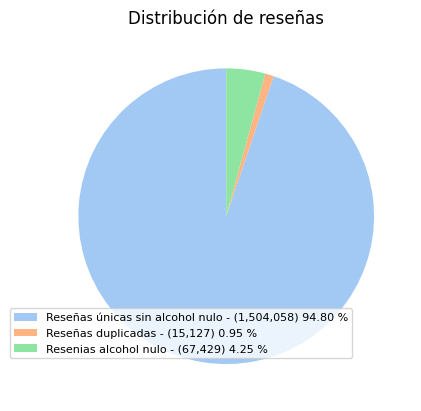

In [39]:
resenias_unicas_sin_alcohol_nulo = len (df_resenias_unicas_sin_alcohol_nulo)

data = [resenias_unicas_sin_alcohol_nulo, resenias_duplicadas, cantidad_resenias_alcohol_nulo]
labels = ['Reseñas únicas sin alcohol nulo', 'Reseñas duplicadas', 'Resenias alcohol nulo']

y=np.array(data)
porcent = 100.*y/y.sum()

labels = ['{0} - ({2:,}) {1:1.2f} %'.format(i,j,h) for i,j,h in zip(labels, porcent, data)]

colors = sns.color_palette('pastel')[0:5]
plt.title('Distribución de reseñas')
plt.pie(data, colors = colors, startangle=90)
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.1, 0.1), fontsize=8)
plt.show()

### Guardamos el nuevo dataset

In [40]:
file_resenias_unicas_sin_alcohol_nulo = 'dataset/cervezas_resenias_unicas_sin_alcohol_nulo.csv'

In [41]:
df_resenias_unicas_sin_alcohol_nulo.to_csv(file_resenias_unicas_sin_alcohol_nulo, index=False)
df = df_resenias_unicas_sin_alcohol_nulo

In [42]:
df = pd.read_csv(file_resenias_unicas_sin_alcohol_nulo)
df

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,stcules,1234817823,1.5,2.0,2.5,1.5,1.5
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,stcules,1235915097,3.0,2.5,3.0,3.0,3.0
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,stcules,1235916604,3.0,2.5,3.0,3.0,3.0
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,stcules,1234725145,3.0,3.0,3.5,2.5,3.0
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,johnmichaelsen,1293735206,4.0,4.5,4.0,4.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504053,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,maddogruss,1162684892,5.0,4.0,3.5,4.0,4.0
1504054,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,yelterdow,1161048566,4.0,5.0,2.5,2.0,4.0
1504055,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,TongoRad,1160702513,4.5,3.5,3.0,3.5,4.0
1504056,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,dherling,1160023044,4.0,4.5,4.5,4.5,4.5


### ¿Cuántas cervezas tenemos?

In [43]:
df_cervezas = df.loc[:, ['beer_beerid','beer_name','brewery_id','brewery_name','beer_style','beer_abv']].drop_duplicates()
file_cervezas_unicas = 'dataset/cervezas_unicas.csv'
df_cervezas.to_csv(file_cervezas_unicas, index=False)

In [44]:
pd.DataFrame(
    {
        'Titulo' : ['Total de cervezas', 'Numero de reseñas unicas', 'Promedio de reseñas por cerveza'],
        'Valores' : [str(len(df_cervezas)), str(len(df_resenias_unicas)), str(round(len(df_resenias_unicas) / len(df_cervezas), 2))],
    }
)

,Titulo,Valores
0,Total de cervezas,49011
1,Numero de reseñas unicas,1571487
2,Promedio de reseñas por cerveza,32.06


## Generando agrupación de datos por cerveza

#### Transformando el review time a fecha

In [45]:
pd.options.mode.chained_assignment = None 
df['review_date'] = pd.to_datetime(df['review_time'], unit='s').dt.date
df.head(5)

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_date
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,stcules,1234817823,1.5,2.0,2.5,1.5,1.5,2009-02-16
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,stcules,1235915097,3.0,2.5,3.0,3.0,3.0,2009-03-01
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,stcules,1235916604,3.0,2.5,3.0,3.0,3.0,2009-03-01
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,stcules,1234725145,3.0,3.0,3.5,2.5,3.0,2009-02-15
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,johnmichaelsen,1293735206,4.0,4.5,4.0,4.0,4.5,2010-12-30


#### Generando un dataset de valores unicos por cerveza

In [46]:
df_cervezas_unicas_resumen_valores = df.groupby(['beer_beerid']).agg(
    #review_overall
    review_overall = ('review_overall', 'mean'),
    
    #review_aroma
    review_aroma = ('review_aroma', 'mean'),
    
    #review_appearance
    review_appearance = ('review_appearance', 'mean'),
    
    #review_palate
    review_palate = ('review_palate', 'mean'),
    
    #review_taste
    review_taste = ('review_taste', 'mean'),
    
    #review_time
    cantidad_revisiones = ('review_time', 'nunique'),
    
    #review_date
    revision_primera = ('review_date', np.min),
    revision_ultima = ('review_date', np.max)
).reset_index()
    
max_fecha = max(df['review_date'])

df_cervezas_unicas_resumen_valores['edad'] = ((max_fecha - df_cervezas_unicas_resumen_valores['revision_primera']) / np.timedelta64(1, 'Y')) + 1
df_cervezas_unicas_resumen_valores = df_cervezas_unicas_resumen_valores.astype({'edad':'int'})

df_cervezas_unicas_resumen_valores['disponibilidad'] = ((df_cervezas_unicas_resumen_valores['revision_ultima'] - df_cervezas_unicas_resumen_valores['revision_primera']) / np.timedelta64(1, 'Y'))+1
df_cervezas_unicas_resumen_valores = df_cervezas_unicas_resumen_valores.astype({'disponibilidad':'int'})

df_cervezas_unicas_resumen_valores.head()

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,cantidad_revisiones,revision_primera,revision_ultima,edad,disponibilidad
0,5,3.554762,3.208333,3.488095,3.323810,3.342857,420,2001-07-08,2012-01-01,11,11
1,6,3.707807,3.515499,3.839839,3.513777,3.644087,871,2001-03-02,2012-01-02,11,11
2,7,3.269466,3.177099,3.250382,3.107634,3.101527,655,2001-10-19,2011-12-31,11,11
3,8,3.647059,3.080882,3.294118,3.301471,3.235294,68,2002-04-10,2011-06-29,10,10
4,9,3.400862,2.853448,3.051724,3.103448,3.043103,116,2002-03-15,2011-11-03,10,10


#### Agregamos los datos de las cervezas (nombre, abv, etc.)

In [47]:
df_cervezas_unicas_resumen_valores = pd.merge(df_cervezas, df_cervezas_unicas_resumen_valores, on='beer_beerid')
df_cervezas_unicas_resumen_valores.head()

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,cantidad_revisiones,revision_primera,revision_ultima,edad,disponibilidad
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,1.5,2.0,2.5,1.5,1.5,1,2009-02-16,2009-02-16,3,1
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,3.0,2.5,3.0,3.0,3.0,1,2009-03-01,2009-03-01,3,1
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,3.0,2.5,3.0,3.0,3.0,1,2009-03-01,2009-03-01,3,1
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,3.0,3.0,3.5,2.5,3.0,1,2009-02-15,2009-02-15,3,1
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,4.0,4.5,4.0,4.0,4.5,1,2010-12-30,2010-12-30,2,1


In [48]:
file_cervezas_unicas_resumen_valores = 'dataset/cervezas_unicas_resumen_valores.csv'

df_cervezas_unicas_resumen_valores.to_csv(file_cervezas_unicas_resumen_valores, index=False)
df = df_cervezas_unicas_resumen_valores

df.head()

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,cantidad_revisiones,revision_primera,revision_ultima,edad,disponibilidad
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,1.5,2.0,2.5,1.5,1.5,1,2009-02-16,2009-02-16,3,1
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,3.0,2.5,3.0,3.0,3.0,1,2009-03-01,2009-03-01,3,1
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,3.0,2.5,3.0,3.0,3.0,1,2009-03-01,2009-03-01,3,1
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,3.0,3.0,3.5,2.5,3.0,1,2009-02-15,2009-02-15,3,1
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,4.0,4.5,4.0,4.0,4.5,1,2010-12-30,2010-12-30,2,1


#### Media: Overall review (dataset cervezas)

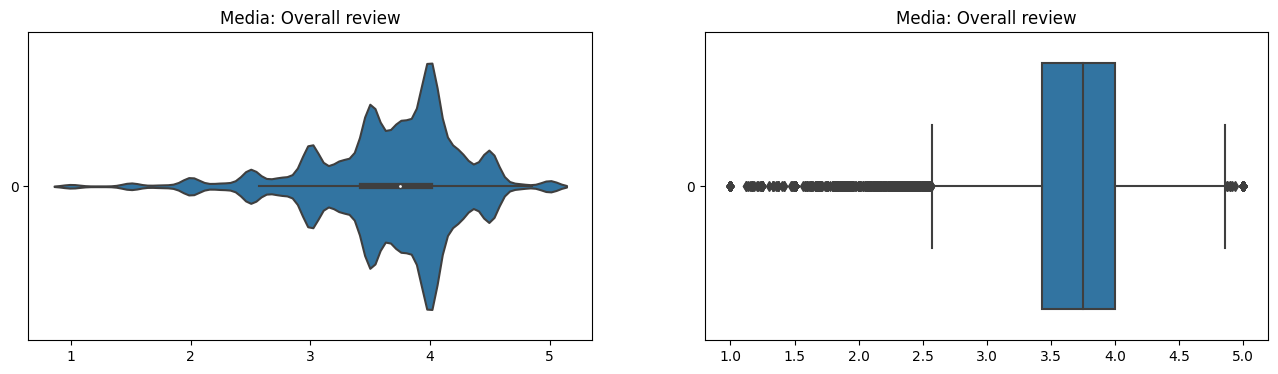

In [49]:
acu.plot_boxplot_violin(df['review_overall'], 'Media: Overall review')

#### Media: Aroma review (dataset cervezas)

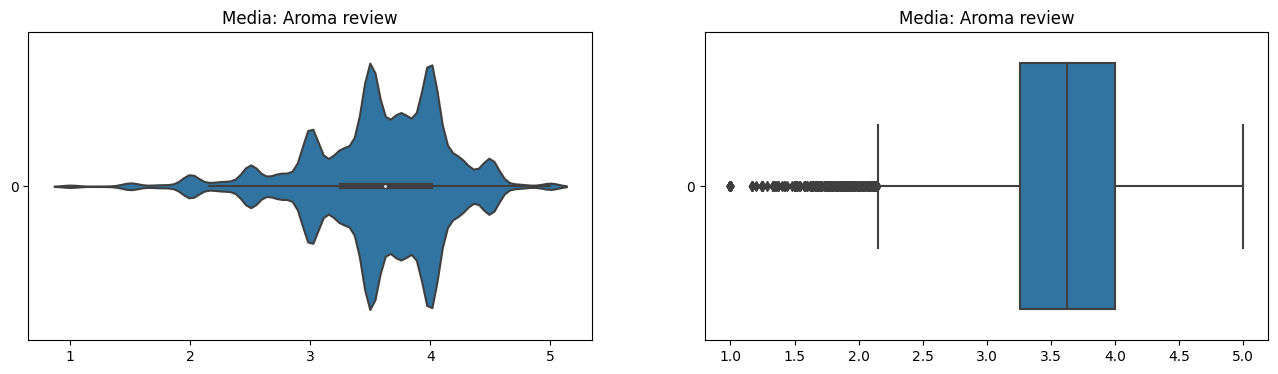

In [50]:
acu.plot_boxplot_violin(df['review_aroma'], 'Media: Aroma review')

#### Media: Appearance review (dataset cervezas)

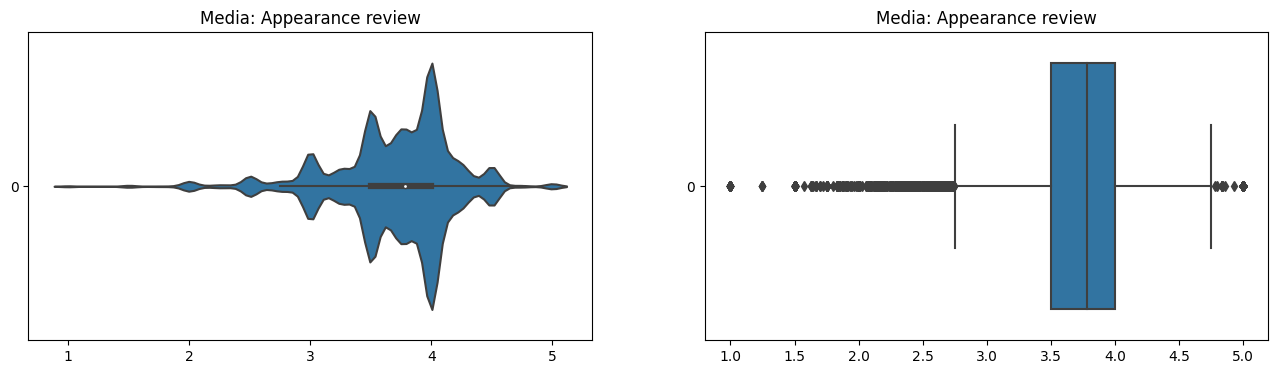

In [51]:
acu.plot_boxplot_violin(df['review_appearance'], 'Media: Appearance review')

#### Media: Palate review (dataset cervezas)

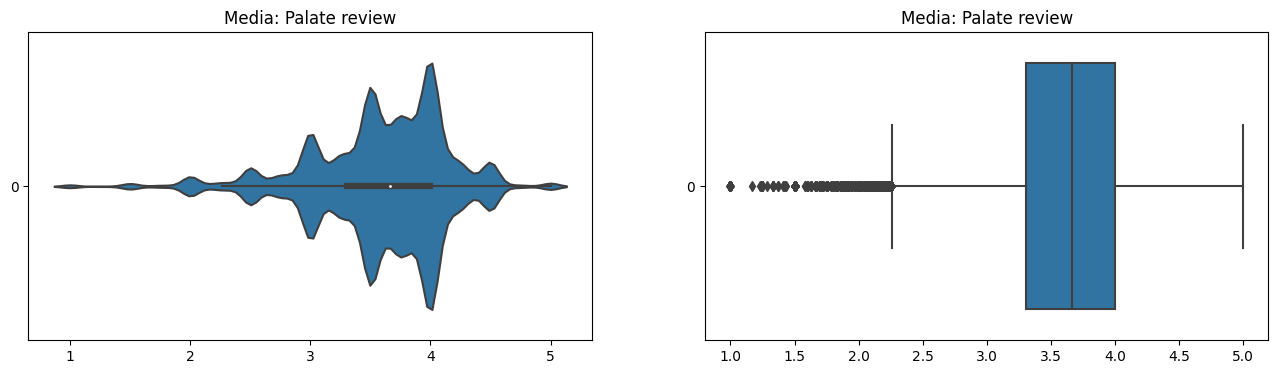

In [52]:
acu.plot_boxplot_violin(df['review_palate'], 'Media: Palate review')

#### Media: Taste review (dataset cervezas)

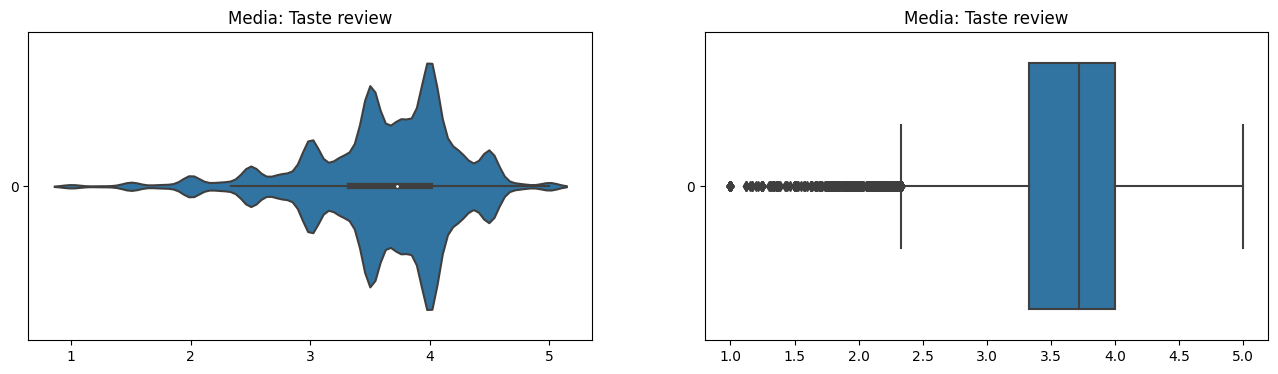

In [53]:
acu.plot_boxplot_violin(df['review_taste'], 'Media: Taste review')

#### Cantidad de revisiones (dataset cervezas)

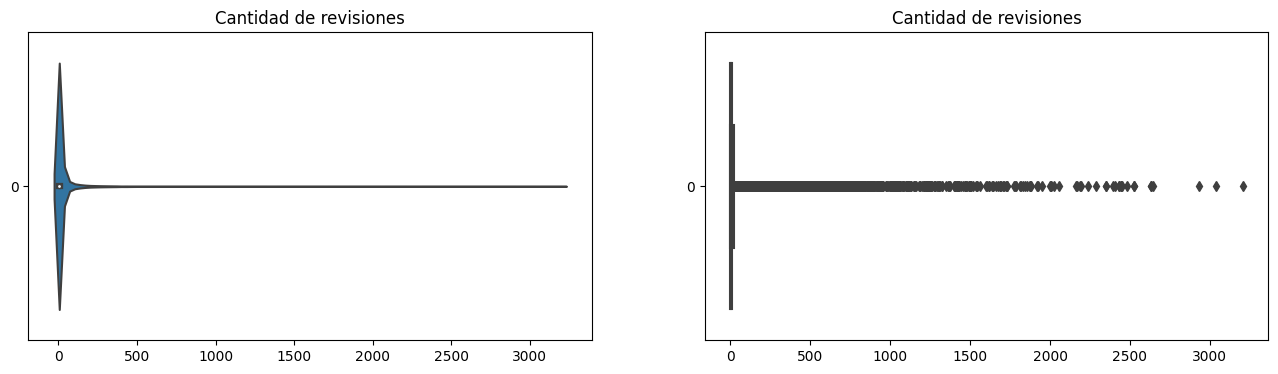

In [54]:
acu.plot_boxplot_violin(df['cantidad_revisiones'], 'Cantidad de revisiones')

#### Alcohol by volume (dataset cervezas)

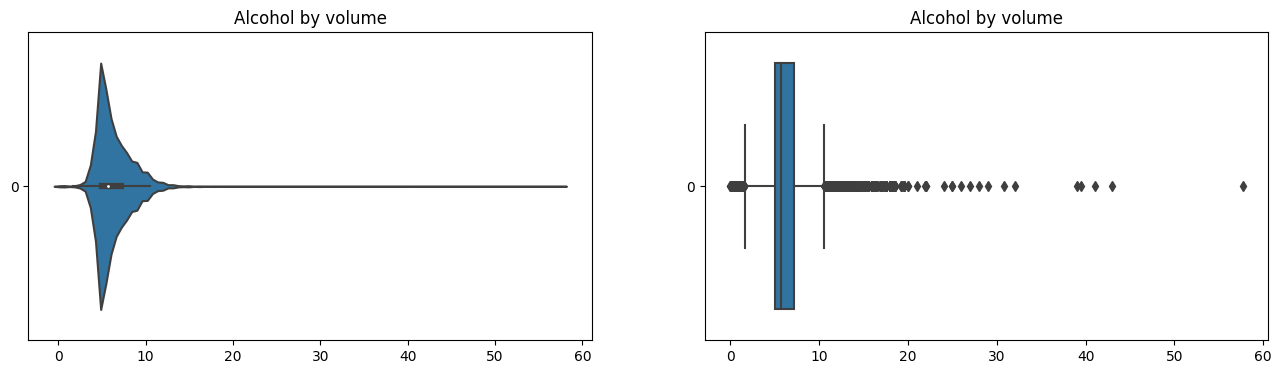

In [55]:
acu.plot_boxplot_violin(df['beer_abv'], 'Alcohol by volume')